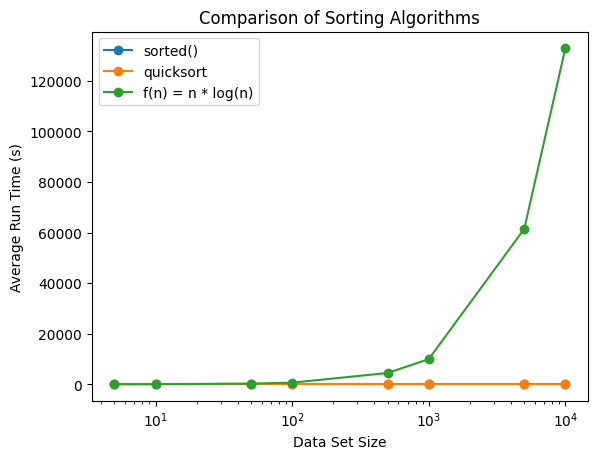

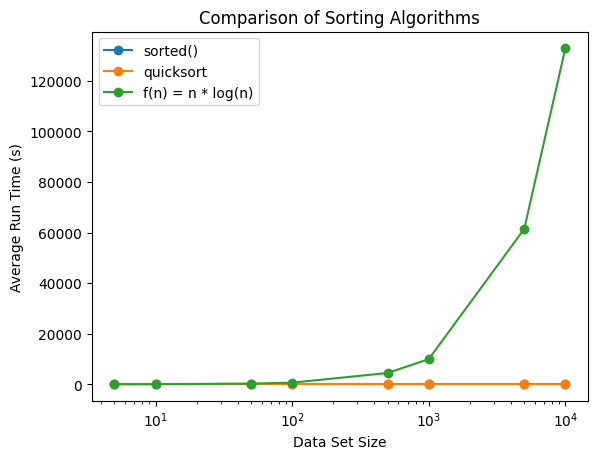

In [14]:
import random
import timeit
import math
import matplotlib.pyplot as plt

%matplotlib inline

# Function to generate a random dataset
def generate_random_dataset(size):
    return [random.randint(1, 100) for _ in range(size)]

# Quicksort implementation
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        left = [x for x in arr[1:] if x <= pivot]
        right = [x for x in arr[1:] if x > pivot]
        return quick_sort(left) + [pivot] + quick_sort(right)

# Function to calculate average run time with quicksort function
def average_run_time_quicksort(size, number_of_runs):
    total_run_time = 0
    for _ in range(number_of_runs):
        dataset = generate_random_dataset(size)
        start_time = timeit.default_timer()
        quick_sort(dataset.copy())  # Use a copy of the dataset
        end_time = timeit.default_timer()
        elapsed_time = end_time - start_time
        total_run_time += elapsed_time
    
    average_run_time = total_run_time / number_of_runs
    return average_run_time

# Function to calculate average run time with sorted function
def average_run_time_sorted(size, number_of_runs):
    total_run_time = 0
    for _ in range(number_of_runs):
        dataset = generate_random_dataset(size)
        start_time = timeit.default_timer()
        sorted(dataset)
        end_time = timeit.default_timer()
        elapsed_time = end_time - start_time
        total_run_time += elapsed_time
    
    average_run_time = total_run_time / number_of_runs
    return average_run_time

# Sizes for the dataset
sizes = [5, 10, 50, 100, 500, 1000, 5000, 10000]

# Number of runs
number_of_runs = 10  # Adjust this based on your requirements

# Lists to store run times for different sorting algorithms
run_times_sorted = []
run_times_quicksort = []
n_log_n_values = []

# Calculate run times for different sorting algorithms
for size in sizes:
    run_time_sorted = average_run_time_sorted(size, number_of_runs)
    run_times_sorted.append(run_time_sorted)

    run_time_quicksort = average_run_time_quicksort(size, number_of_runs)
    run_times_quicksort.append(run_time_quicksort)

    n_log_n_values.append(size * math.log2(size))

# Plotting the graph using matplotlib.pyplot
plt.plot(sizes, run_times_sorted, label='sorted()', marker='o')
plt.plot(sizes, run_times_quicksort, label='quicksort', marker='o')
plt.plot(sizes, n_log_n_values, label='f(n) = n * log(n)', marker='o')
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.xlabel('Data Set Size')
plt.ylabel('Average Run Time (s)')
plt.title('Comparison of Sorting Algorithms')
plt.legend(loc='upper left')  # Adjust the legend placement

# Display the plot using the display function
display(plt.gcf())
